In [17]:
from ase.io import read
from ase.visualize import view

silica= read("Quartz_UC.xyz")
print(silica)
# view(silica, viewer="x3d")

Atoms(symbols='Si3O6', pbc=True, cell=[[4.916, 0.0, 0.0], [-2.458, 4.2574, 0.0], [0.0, 0.0, 5.4505]])


In [18]:
from searching_ring.Molecular_Graph import Molecule_To_Graph

silica_graph = Molecule_To_Graph(structure=silica, periodic=[True, True, True], max_ring=25)

mol_graph, si_nodes = silica_graph.full_routine()

print(mol_graph, len(si_nodes), silica_graph.structure)

900
Structure too small to compute every 25-rings, must create a [5. 5. 4.] supercell.
Graph with 24300 nodes and 32400 edges 900 Atoms(symbols='O16200Si8100', pbc=True, cell=[[73.74000000000001, 0.0, 0.0], [-36.870000000000005, 63.861, 0.0], [0.0, 0.0, 65.406]])


In [19]:
from searching_ring.Primitive_ring_search import Primitive_ring_search
import networkx as nx
import time

# start_time = time.time()
# dist_list = dict(nx.all_pairs_shortest_path_length(mol_graph, cutoff=15//2 + 1))
# end_time = time.time()
# print(f"Computing all shotest paths took {end_time - start_time} seconds.")

start_time = time.time()
silica_ring = Primitive_ring_search(graph=mol_graph, max_size=25, src_nodes=[si_nodes[0]])
rings = silica_ring.search_primitive_ring()
end_time = time.time()
print(f"Finding primitive rings took {end_time - start_time} seconds.")

Computing primitive nodes took in average 0.0010118484497070312 seconds
Computing potential rings took in average 0.009428977966308594 seconds
Computing primitive rings took in average 0.00028705596923828125 seconds
Finding primitive rings took 9.889718055725098 seconds.


900
{2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 6, 13: 0, 14: 0, 15: 0, 16: 40, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0}


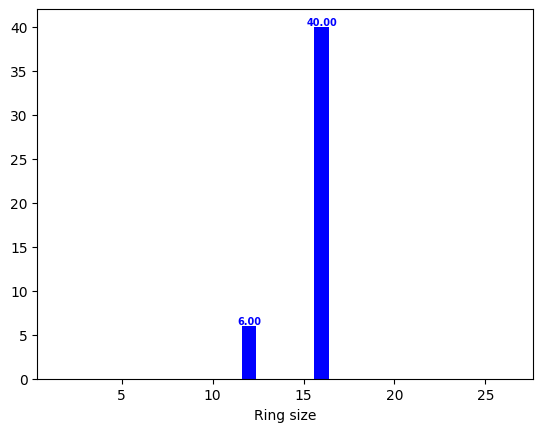

In [20]:
print(len(si_nodes))
print(silica_ring.prim_rings)
silica_ring.plot()

In [21]:
from searching_ring.Molecular_Graph import Molecule_To_Graph
from ase.io import write
real_silica_graph = Molecule_To_Graph(structure=silica, periodic=[True, True, True], silica=True, max_ring=25)

real_mol_graph, real_si_nodes = real_silica_graph.full_routine()

print(real_mol_graph, len(si_nodes), real_silica_graph.structure)
# write("Coesite_SC_Check.pdb", silica_graph.structure)

900
Structure too small to compute every 25-rings, must create a [5. 5. 4.] supercell.
Graph with 8100 nodes and 16200 edges 900 Atoms(symbols='O16200Si8100', pbc=True, cell=[[73.74000000000001, 0.0, 0.0], [-36.870000000000005, 63.861, 0.0], [0.0, 0.0, 65.406]])


In [22]:
from searching_ring.Primitive_ring_search import Primitive_ring_search
import networkx as nx
import time

# start_time = time.time()
# dist_list = dict(nx.all_pairs_shortest_path_length(mol_graph, cutoff=15//2 + 1))
# end_time = time.time()
# print(f"Computing all shotest paths took {end_time - start_time} seconds.")

start_time = time.time()
real_silica_ring = Primitive_ring_search(graph=real_mol_graph, max_size=13, src_nodes=real_si_nodes)
real_rings = real_silica_ring.search_primitive_ring()
end_time = time.time()
print(f"Finding primitive rings took {end_time - start_time} seconds.")

Computing primitive nodes took in average 0.00038044055302937827 seconds
Computing potential rings took in average 0.0035138781865437824 seconds
Computing primitive rings took in average 0.00021593491236368816 seconds
Finding primitive rings took 2.749213933944702 seconds.


900
{2: 0, 3: 0, 4: 0, 5: 0, 6: 1800, 7: 0, 8: 12000, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0}
[ 0.  0.  0.  0.  6.  0. 40.  0.  0.  0.  0.  0.  0.]


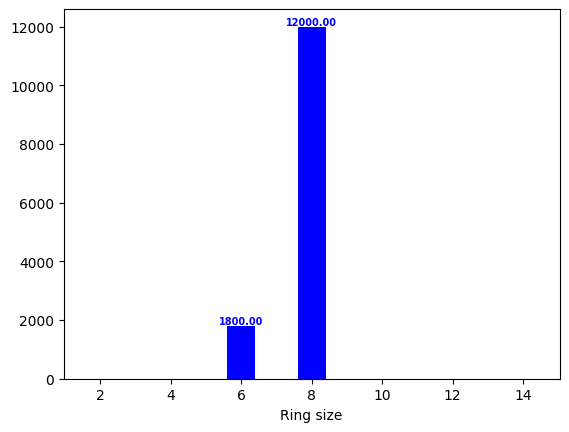

In [23]:
import numpy as np
print(len(si_nodes))
print(real_silica_ring.prim_rings)
real_silica_ring.plot()
verif = np.array(list(real_silica_ring.prim_rings.values()))/len(real_si_nodes)
print(verif)

In [ ]:
# print(real_rings[real_si_nodes[0]][11])
# print(rings[si_nodes[0]][22])

only_si_rings = []

for i in real_rings[real_si_nodes[0]][11]:
    only_si_rings.append(sorted(i))

full_si_rings = []
oxygen_full_si_rings = []
for i in rings[si_nodes[0]][22]:
    # print('index', ' '.join(str(x) for x in i))
    full_si_rings.append(sorted(i[0::2]))
    oxygen_full_si_rings.append(sorted(i))

# print(len(only_si_rings), len(full_si_rings))

# for i in only_si_rings:
#     if i not in full_si_rings:
#         print(i)

# for i in only_si_rings:
#     found = False
#     for indexj, j in enumerate(full_si_rings):
#         if i == j:
#             print(i, oxygen_full_si_rings[indexj])
#             found = True
#             break
    
#     if not found:
#         print(i)

not_the_same = []

for i in range(len(only_si_rings)):
    try:
        print('index', ' '.join(str(x) for x in only_si_rings[i]))
        print('index', ' '.join(str(x) for x in full_si_rings[i]))
        not_the_same.append(full_si_rings[i])
        not_the_same.append(only_si_rings[i])
    except IndexError: 
        print('index', ' '.join(str(x) for x in full_si_rings[i]))
        not_the_same.append(only_si_rings[i])

print(len(not_the_same))

In [ ]:
for i in real_rings[real_si_nodes[0]][11]:
    print(i)
print(si_nodes[0])

In [ ]:
from searching_ring.Primitive_ring_search import Primitive_ring_search

real_silica_ring = Primitive_ring_search(graph=real_mol_graph, max_size=13, src_nodes=[real_si_nodes[0]])

real_mid_nodes = real_silica_ring.find_prime_mid_nodes(src_node=real_si_nodes[0])

real_future_rings = real_silica_ring.form_rings(src_node=real_si_nodes[0], prime_mid_node=real_mid_nodes)

real_primitive_rings, real_missed = real_silica_ring.new_exclude_non_primitive_rings(real_future_rings)
print(len(real_primitive_rings[11]))

print(len(real_missed[11]))

# ring_a = real_silica_ring.find_all_shortest_paths(starting_node=real_si_nodes[0], final_node=8798)
# ring_b = real_silica_ring.find_all_shortest_paths(starting_node=real_si_nodes[0], final_node=8785)


In [ ]:
from searching_ring.Primitive_ring_search import Primitive_ring_search

import networkx as nx

silica_ring = Primitive_ring_search(graph=mol_graph, max_size=25, src_nodes=[si_nodes[0]])

mid_nodes = silica_ring.find_prime_mid_nodes(src_node=si_nodes[0])

future_rings = silica_ring.form_rings(src_node=si_nodes[0], prime_mid_node=mid_nodes)

future_primitive_rings, missed = silica_ring.new_exclude_non_primitive_rings(future_rings)
# for i in range(len(future_rings[11])):
#     print(future_rings[11][i])

print(len(future_primitive_rings[22]))
print(len(missed[22]))
# ring_a = silica_ring.find_all_shortest_paths(starting_node=si_nodes[0], final_node=8798)
# ring_b = silica_ring.find_all_shortest_paths(starting_node=si_nodes[0], final_node=8785)


In [ ]:
print(real_primitive_rings[11][-1])

In [ ]:
too_much = []
for i in real_missed[11]:
    too_much.append(sorted(i))
print(too_much)

In [ ]:

for i in missed[22]:
    if sorted(i[0::2]) not in too_much:
        print(i[0::2])
        print(*i, sep=" ")

shortest_lengths = silica_ring.distances
full_ring = missed[22][-1]
print(full_ring)
for i in range(1, 11):
    check_node_a = full_ring[i]
    check_node_b = full_ring[i + 11]
    if shortest_lengths[check_node_a][check_node_b] != 11:
        print(*silica_ring.find_all_shortest_paths(starting_node=check_node_a, final_node=check_node_b)[0], sep=" ")
print(full_ring[0::2])

In [ ]:
real_full_ring = real_primitive_rings[11][-1]
real_shortest_path = real_silica_ring.distances
print(real_full_ring)
for i in range(1, 11):
    check_node_a = real_full_ring[i]
    check_node_b1 = real_full_ring[i + 5]
    check_node_b2 = real_full_ring[i + 1 + 5]
    print(real_shortest_path[check_node_a][check_node_b1])
    print(real_shortest_path[check_node_a][check_node_b2])
print(real_mid_nodes[11])
print(real_shortest_path[11240][8785])
    # print(check_node_a, check_node_b1, check_node_b2)
    # print()

In [16]:
ring_size = 7
path_length = ring_size//2

for i in range(1, path_length + 1):
    print(i, i+ path_length, i + path_length + 1)
    print(i, i + path_length, (1 + path_length + i)%ring_size)

1 4 5
1 4 5
2 5 6
2 5 6
3 6 7
3 6 0
